In [1]:
import tensorflow as tf
if tf.config.list_physical_devices('GPU'):
    print('Tensorflow is using the GPU!')

    gpus = tf.config.list_physical_devices('GPU')
    print('Available GPU:', gpus)

    for gpu in gpus:
        details = tf.config.experimental.get_device_details(gpu)
        print("GPU Details:",details)
else:
    print('Tensorflow is using CPU.')

c:\Users\sumit\Desktop\GenAi\Dog_Cat_Classifier\penv\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.21.6)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


Tensorflow is using the GPU!
Available GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Details: {'device_name': 'NVIDIA GeForce RTX 4060 Laptop GPU', 'compute_capability': (8, 9)}


In [2]:
import PIL
# from scipy.sparse import issparse

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout,BatchNormalization
from matplotlib import pyplot as plt

In [4]:
## generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
## Normalization

# def normalization(image,label):
#     image = tf.cast(image/255. , tf.float32),
#     return image,label

# train_ds = train_ds.map(normalization)
# validation_ds = validation_ds.map(normalization)

In [6]:
## Data Augmentation

batch_size=16
## training data augmentation
train_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

## Test data augmentation
test_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_aug.flow_from_directory(
    'train',
    target_size=(256,256),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_generator = train_aug.flow_from_directory(
    'test',
    target_size=(256 ,256),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3))),
# model.add(MaxPooling2D(2, 2)),
# model.add(Conv2D(64, (3, 3), activation='relu')),
# model.add(MaxPooling2D(2, 2)),
# model.add(Conv2D(64, (3, 3), activation='relu')),
# model.add(MaxPooling2D(2, 2)),
# model.add(Conv2D(64, (3, 3), activation='relu')),
# model.add(MaxPooling2D(2, 2)),

# model.add(Flatten()),
# model.add(Dense(512, activation='relu')),
# model.add(BatchNormalization()),
# model.add(Dense(512, activation='relu')),
# # model.add(Dropout(0.1)),
# model.add(BatchNormalization()),
# model.add(Dense(512, activation='relu')),
# # model.add(Dropout(0.2)),
# model.add(BatchNormalization()),
# model.add(Dense(1, activation='sigmoid'))

In [8]:
## CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(11,11), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(32,kernel_size=(5,5), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
# model.add(Conv2D(384,kernel_size=(3,3),strides=1, padding='same',activation='relu'))
# model.add(Conv2D(256,kernel_size=(3,3),strides=1, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))

model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0

In [ ]:
history = model.fit(train_generator,epochs=20,validation_data = test_generator)

Epoch 1/20
1250/1250 [==============================] - 223s 171ms/step - loss: 0.7264 - accuracy: 0.5389 - val_loss: 0.6836 - val_accuracy: 0.5544
Epoch 2/20
1250/1250 [==============================] - 169s 135ms/step - loss: 0.6706 - accuracy: 0.5922 - val_loss: 0.6453 - val_accuracy: 0.6320
Epoch 3/20
1250/1250 [==============================] - 172s 137ms/step - loss: 0.6326 - accuracy: 0.6464 - val_loss: 0.5927 - val_accuracy: 0.6874
Epoch 4/20
1250/1250 [==============================] - 163s 130ms/step - loss: 0.6082 - accuracy: 0.6693 - val_loss: 0.6044 - val_accuracy: 0.6790
Epoch 5/20
1250/1250 [==============================] - 167s 133ms/step - loss: 0.5832 - accuracy: 0.6945 - val_loss: 0.5705 - val_accuracy: 0.7068
Epoch 6/20
1250/1250 [==============================] - 160s 128ms/step - loss: 0.5765 - accuracy: 0.7024 - val_loss: 0.6526 - val_accuracy: 0.6332
Epoch 7/20
1250/1250 [==============================] - 306s 245ms/step - loss: 0.5659 - accuracy: 0.7123 - val_

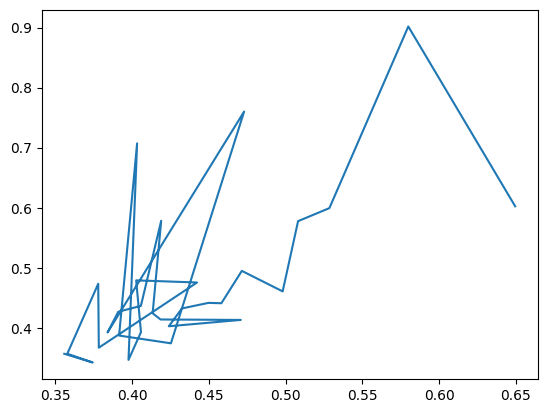

In [ ]:
plt.plot(history.history['loss'],history.history['val_loss'])

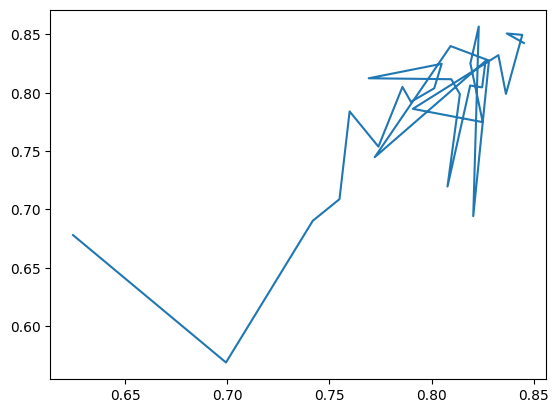

In [ ]:
plt.plot(history.history['accuracy'],history.history['val_accuracy'])

In [ ]:
## Saving the model
model.save('classification_model.h5')

In [ ]:
model_test = keras.models.load_model('classification_model.h5')
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 140, 140, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0